## Problem statement
Taking into consideration all the independent features we have to predict the strength of cement.

In [1]:
#Data manipulation libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sci

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel("Capstone Project.xlsx")
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [3]:
df.tail()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06
1029,540.0,0.0,0.0,173.0,0.0,1125.0,613.0,7,52.61


In [4]:
df.shape

(1030, 9)

In [5]:
df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


#### Analysis:
- As each column has count of 1030, this dataset doesn't have missing values.
- The difference bw mean and median is high which is a sign that slag, ash, age might have outliers.
- As the values for age range from 1 to 365 we can say that it is yearly data.
- Age column is only highly skewed rest all are aprroximately normal distributed.



## Building a custom summary function for EDA.

In [6]:
def describe(my_df):
    cols = []
    for i in my_df.columns:
        if my_df[i].dtype != object:
            cols.append(i)
    result = pd.DataFrame(columns= cols, index= ['Datatype', 'Count', 'min', 'Q1', 'Q2', 'mean', 'Q3', 'max', 'Std',
                                                 'Skewness', 'Kurtosis', 'Range', 'IQR', 'Skewness comment', 'Outlier comment',
                                                'Kurtosis comment'])
    for i in result.columns:
        result.loc['Datatype',i] = my_df[i].dtype
        result.loc['Count',i] = my_df[i].count()
        result.loc['min',i] = my_df[i].min()
        result.loc['Q1',i] = my_df[i].quantile(0.25)
        result.loc['Q2',i] =my_df[i].quantile(0.5)
        result.loc['mean',i] =round(my_df[i].mean(),2)
        result.loc['Q3',i] =my_df[i].quantile(0.75)
        result.loc['max',i] =my_df[i].max()
        result.loc['Std',i] =round(my_df[i].std(),2)
        result.loc['Skewness',i] =round(my_df[i].skew(),2)
        result.loc['Kurtosis',i] =round(my_df[i].kurt(),2)
        result.loc['Range',i] = my_df[i].max() - my_df[i].min()
        result.loc['IQR',i] = my_df[i].quantile(0.75) - my_df[i].quantile(0.25)
        
        
        #Adding comments for skewness
        if result.loc['Skewness', i] <= -1:
            sk_label = 'Highly negatively skewed'
        elif -1  < result.loc['Skewness', i] <= -0.5:
            sk_label = 'Moderatively negatively Skewed'
        elif -0.5  < result.loc['Skewness', i] < 0:
            sk_label = 'Approximately Normal distribution(-ve)'
        elif 0  <= result.loc['Skewness', i] < 0.5:
            sk_label = 'Approximately Normal distribution(+ve)'
        elif 0.5  <= result.loc['Skewness', i] < 1:
            sk_label = 'Moderatively positively Skewed'
        elif result.loc['Skewness', i] >= 1:
            sk_label = 'Highly positively Skewed'
        else:
            sk_label = 'Error'
            
        result.loc['Skewness comment', i] = sk_label
            
            
            
         #Adding comments for Kurtosis
        if result.loc['Kurtosis', i] <= -1:
            kt_label = 'Highly platykurtic curve'
        elif -1  < result.loc['Kurtosis', i] <= -0.5:
            kt_label = 'Moderatively platykurtic curve'
        elif -0.5  < result.loc['Kurtosis', i] < 0.5:
            kt_label = 'Mesokurtic curve'
        elif 0.5  <= result.loc['Kurtosis', i] < 1:
            kt_label = 'Moderatively laptokurtic curve'
        elif result.loc['Kurtosis', i] >= 1:
            kt_label = 'Highly laptokurtic curve'
        else:
            kt_label = 'Error'
            
        result.loc['Kurtosis comment', i] = kt_label
        
        
        #Adding comments for Outliers
        upper_limit = result.loc['Q3', i]+ (1.5 * result.loc['IQR', i])
        lower_limit = result.loc['Q1', i]- (1.5 * result.loc['IQR', i])
        if len([x for x in  my_df[i] if x < lower_limit or x > upper_limit]) > 0:
            outlier_label = 'Have outliers'
        else:
            outlier_label = 'No outliers'
        result.loc['Outlier comment', i] = outlier_label
    display(result)

In [7]:
describe(df)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
Datatype,float64,float64,float64,float64,float64,float64,float64,int64,float64
Count,1030,1030,1030,1030,1030,1030,1030,1030,1030
min,102.0,0.0,0.0,121.8,0.0,801.0,594.0,1,2.33
Q1,192.375,0.0,0.0,164.9,0.0,932.0,730.95,7.0,23.71
Q2,272.9,22.0,0.0,185.0,6.4,968.0,779.5,28.0,34.445
mean,281.17,73.9,54.19,181.57,6.2,972.92,773.58,45.66,35.82
Q3,350.0,142.95,118.3,192.0,10.2,1029.4,824.0,56.0,46.135
max,540.0,359.4,200.1,247.0,32.2,1145.0,992.6,365,82.6
Std,104.51,86.28,64.0,21.35,5.97,77.75,80.18,63.17,16.71
Skewness,0.51,0.8,0.54,0.07,0.91,-0.04,-0.25,3.27,0.42


## Analysis from custom summary
1. All features are numerical.
2. none of the columns have missing value.
3. Age is only feature which is highly skewed.
4. six columns have outliers.
5. Three columns have kurtosis.
6. slag, ash and superplastic do not having outliers towards the lower whisker as minimum & Q1 are same.
7. Age column has values in days since the value ranges from 1 to 365.

## Performing outlier treatment

In [8]:
def replace_outlier(df, col, method = 'Quartile', strategy = 'median'):
    col_data = df[col]
    
    
    #using quartile to set the values
    if method == 'Quartile':
        Q2 = col_data.quantile(0.5)
        Q1 = col_data.quantile(0.25)
        Q3 = col_data.quantile(0.75)
        
        IQR = Q3 - Q1
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR
        
    #using stdev to set the values
    elif method == 'stdev':
        mean = col_data.mean()
        stdev = col_data.std()
    
        lower_limit = mean - 2* stdev
        upper_limit = mean + 2* stdev
    
    else:
        print('pass a correct method')
        
    outliers = df.loc[(col_data < lower_limit) | (col_data > upper_limit), col]
    outlier_density = round(len(outliers)/ len(df), 2)

    if len(outliers) == 0:
        print(f'Feature {col} does not have any outliers')
        print('\n')
        
    else: 
        print(f'Feature {col} has outliers')
        print('\n')
        print(f'Total no of outliers in {col} are {len(outliers)}')
        print('\n')
        print(f'Outlier percentage in {col} is {outlier_density}')
        print('\n')
        
        display(df[(col_data < lower_limit) | (col_data > upper_limit)])


    #Replacing outliers
    if strategy == 'median':
        df.loc[(col_data < lower_limit) | (col_data > upper_limit), col] = Q2
    elif strategy == 'mean':
        df.loc[(col_data < lower_limit) | (col_data > upper_limit), col] = mean
    else:
        print('pass a correct strategy')
        
    return(df)
        
        
        
        
        
        

## ODT plots 
1. Descriptive plot.
2. Histogram with outliers.
3. Histogram without outliers.

In [9]:
def odt_plots(df, col):
    f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize= (25, 8))
    # descriptive statistics boxplots 
    sns.boxplot(df[col], ax= ax1)
    ax1.set_title(col + ' boxplot')
    ax1.set_xlabel('Boxplot')
    ax1.set_ylabel('values')
    
    #plotting histogram with outliers
    sns.distplot(df[col], ax= ax2, fit = sci.norm)
    ax2.axvline(df[col].mean(), color= 'g')
    ax2.axvline(df[col].median(), color= 'b')
    ax2.set_title(col + ' Histogram with outliers')
    ax2.set_xlabel('Boxplot')
    ax2.set_ylabel('values')
    
    #Replacing outliers
    df_out = replace_outlier(df, col)
    
     #plotting histogram without outliers
    sns.distplot(df[col], ax= ax3, fit= sci.norm)
    ax3.axvline(df[col].mean(), color= 'g')
    ax3.axvline(df[col].median(), color= 'b')
    ax3.set_title(col + ' Histogram without outliers')
    ax3.set_xlabel('Density')
    ax3.set_ylabel('values')
    plt.show()
    
    

Feature cement does not have any outliers




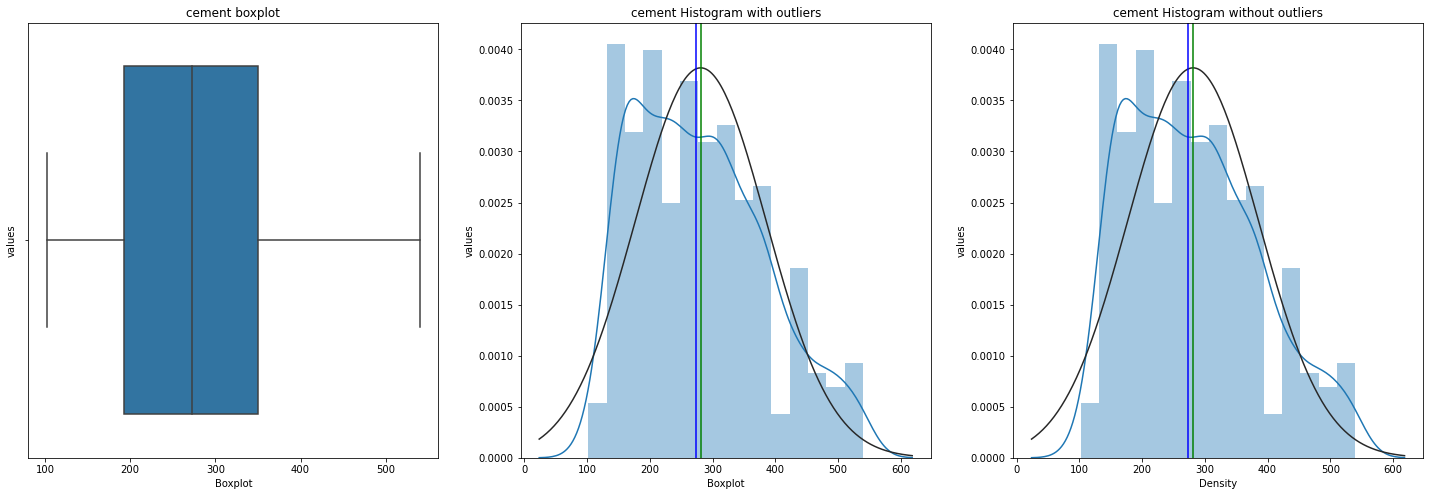

Feature slag has outliers


Total no of outliers in slag are 2


Outlier percentage in slag is 0.0




,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
918,239.6,359.4,0.0,185.7,0.0,941.6,664.3,28,39.44
990,239.6,359.4,0.0,185.7,0.0,941.6,664.3,7,25.42


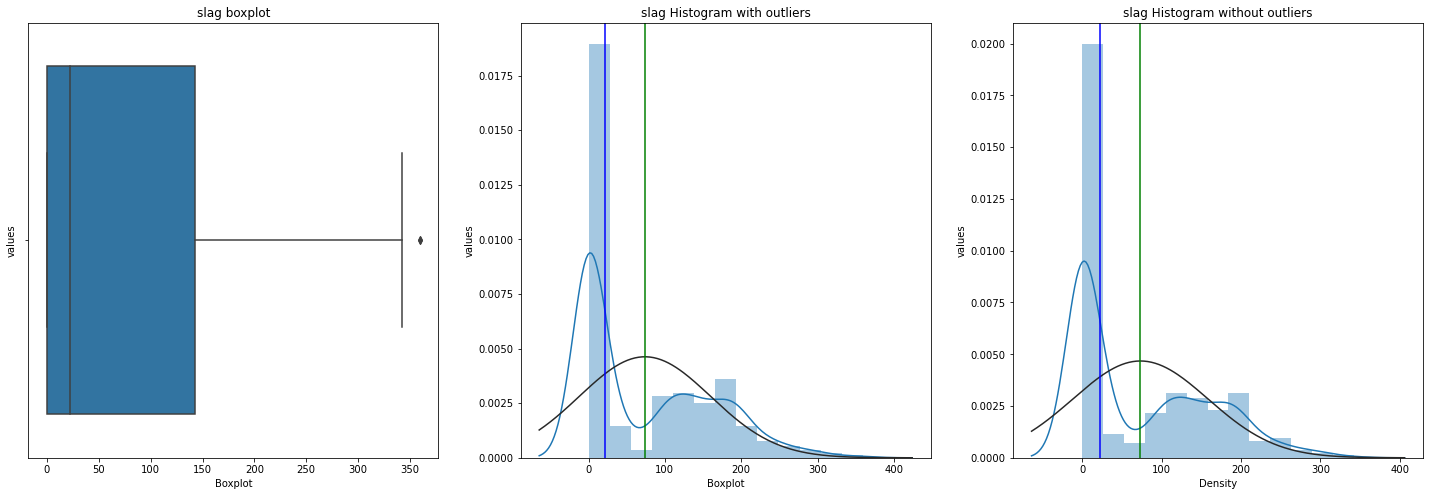

Feature ash does not have any outliers




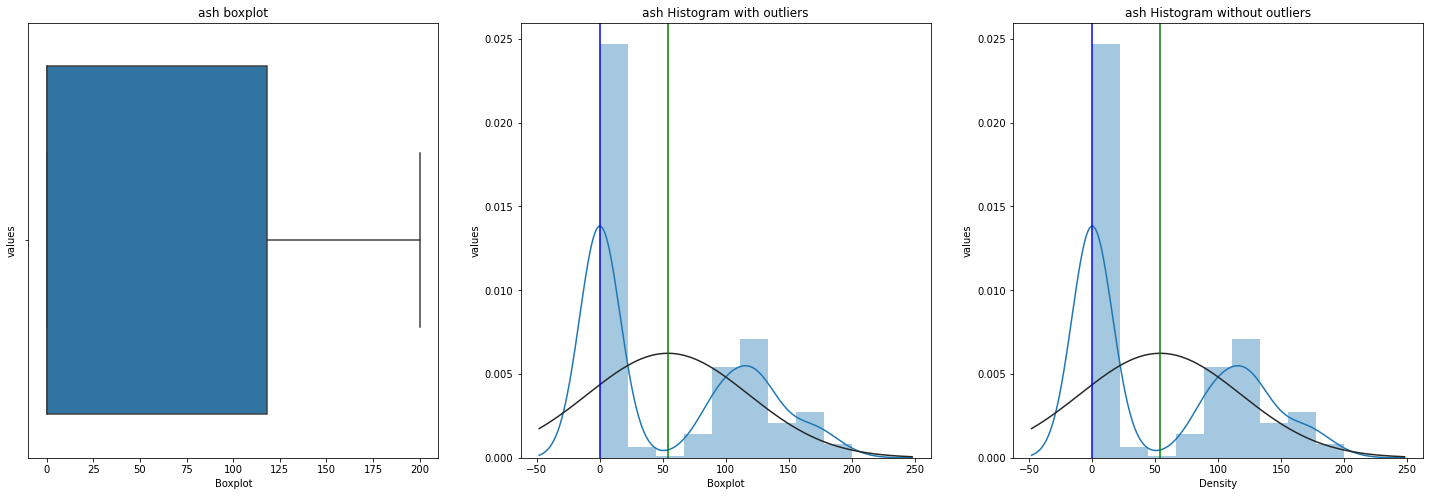

Feature water has outliers


Total no of outliers in water are 9


Outlier percentage in water is 0.01




,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
66,237.0,92.0,71.0,247.0,6.0,853.0,695.0,28,28.63
263,236.9,91.7,71.5,246.9,6.0,852.9,695.4,28,28.63
432,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,28,24.24
462,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,100,39.23
587,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,3,7.75
740,140.0,164.0,128.0,237.0,6.0,869.0,656.0,28,35.23
789,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,56,32.85
826,139.7,163.9,127.7,236.7,5.8,868.6,655.6,28,35.23
914,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,14,17.82


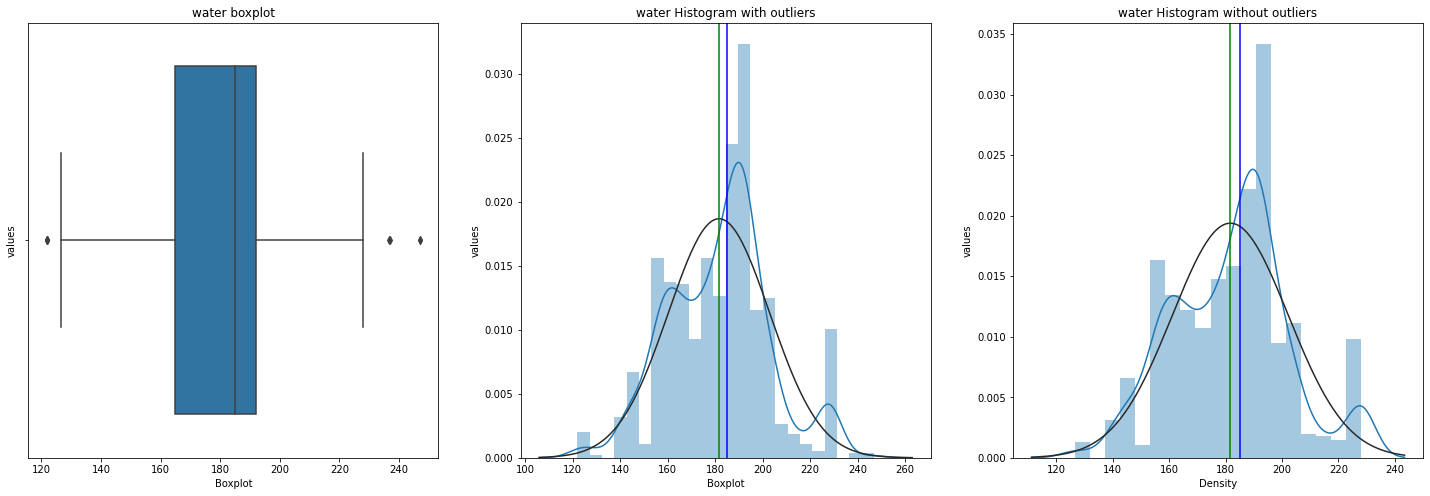

Feature superplastic has outliers


Total no of outliers in superplastic are 10


Outlier percentage in superplastic is 0.01




,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
44,531.3,0.0,0.0,141.8,28.2,852.1,893.7,91,59.2
156,531.3,0.0,0.0,141.8,28.2,852.1,893.7,28,56.4
232,469.0,117.2,0.0,137.8,32.2,852.1,840.5,56,69.3
292,469.0,117.2,0.0,137.8,32.2,852.1,840.5,91,70.7
538,531.3,0.0,0.0,141.8,28.2,852.1,893.7,7,46.9
744,469.0,117.2,0.0,137.8,32.2,852.1,840.5,7,54.9
816,469.0,117.2,0.0,137.8,32.2,852.1,840.5,28,66.9
838,531.3,0.0,0.0,141.8,28.2,852.1,893.7,56,58.8
955,469.0,117.2,0.0,137.8,32.2,852.1,840.5,3,40.2
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.3


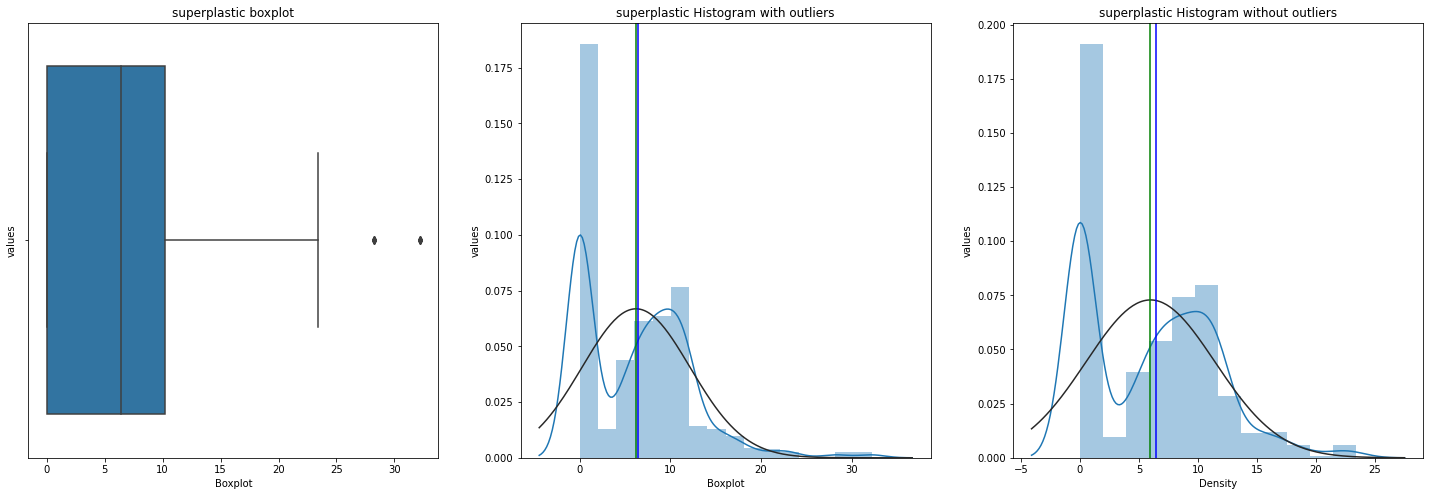

Feature coarseagg does not have any outliers




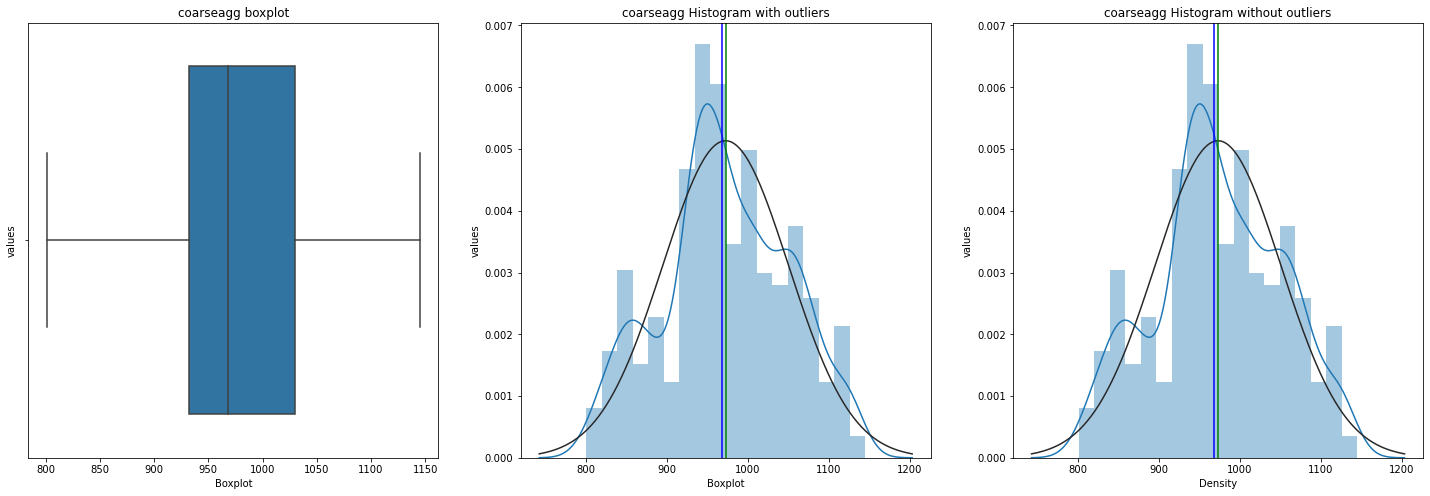

Feature fineagg has outliers


Total no of outliers in fineagg are 5


Outlier percentage in fineagg is 0.0




,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
129,375.0,93.8,0.0,126.6,23.4,852.1,992.6,91,62.5
447,375.0,93.8,0.0,126.6,23.4,852.1,992.6,7,45.7
504,375.0,93.8,0.0,126.6,23.4,852.1,992.6,3,29.0
584,375.0,93.8,0.0,126.6,23.4,852.1,992.6,56,60.2
857,375.0,93.8,0.0,126.6,23.4,852.1,992.6,28,56.7


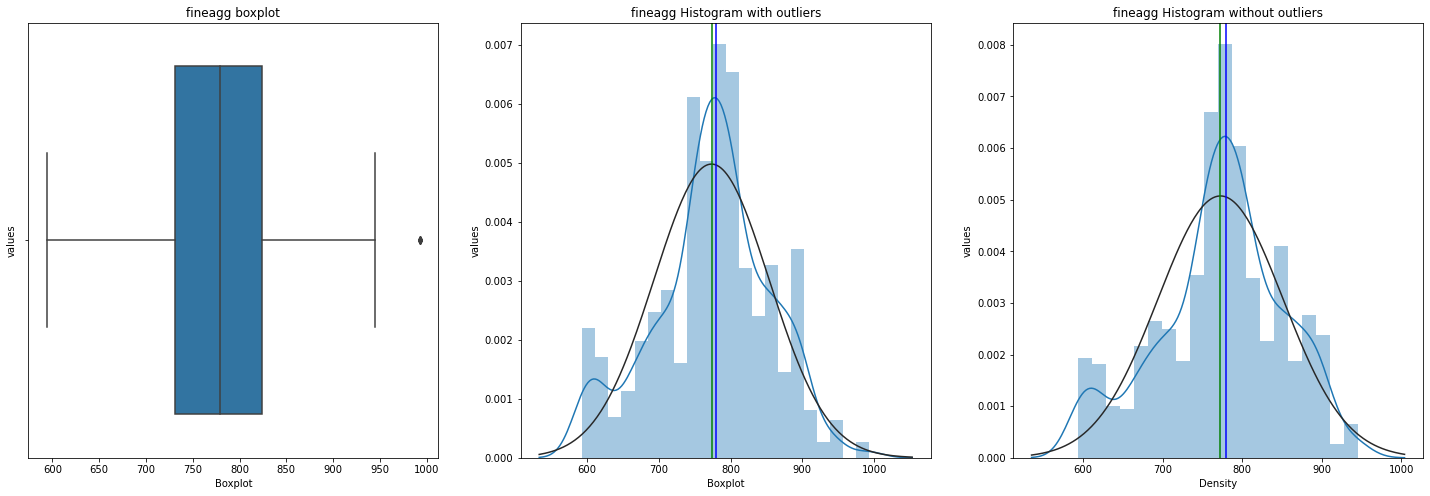

Feature age has outliers


Total no of outliers in age are 59


Outlier percentage in age is 0.06




,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
51,331.0,0.0,0.0,192.0,0.0,978.0,825.0,180,39.00
64,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
93,427.5,47.5,0.0,228.0,0.0,932.0,594.0,180,41.84
99,237.5,237.5,0.0,228.0,0.0,932.0,594.0,180,36.25
103,380.0,0.0,0.0,228.0,0.0,932.0,670.0,180,53.10
133,236.0,0.0,0.0,193.0,0.0,968.0,885.0,365,25.08
144,302.0,0.0,0.0,203.0,0.0,974.0,817.0,180,26.74
149,380.0,95.0,0.0,228.0,0.0,932.0,594.0,270,41.15
152,322.0,0.0,0.0,203.0,0.0,974.0,800.0,180,29.59
157,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


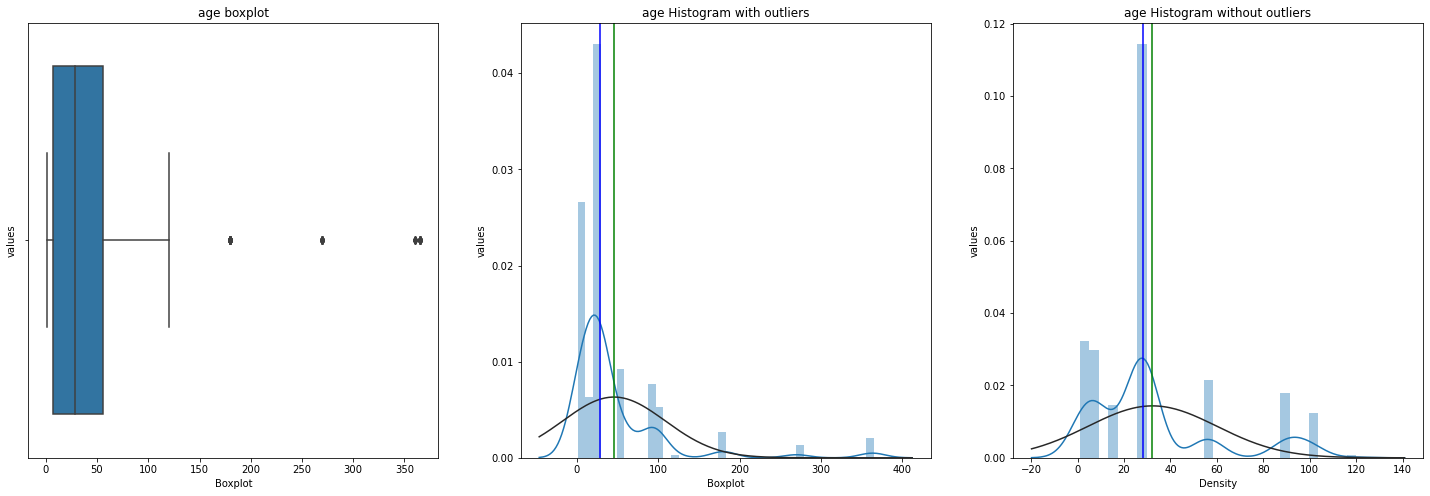

Feature strength has outliers


Total no of outliers in strength are 4


Outlier percentage in strength is 0.0




,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
192,315.0,137.0,0.0,145.0,5.9,1130.0,745.0,28.0,81.75
732,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.0,79.99
950,389.9,189.0,0.0,145.9,22.0,944.7,755.8,91.0,82.60
1003,323.7,282.8,0.0,183.8,10.3,942.7,659.9,56.0,80.20


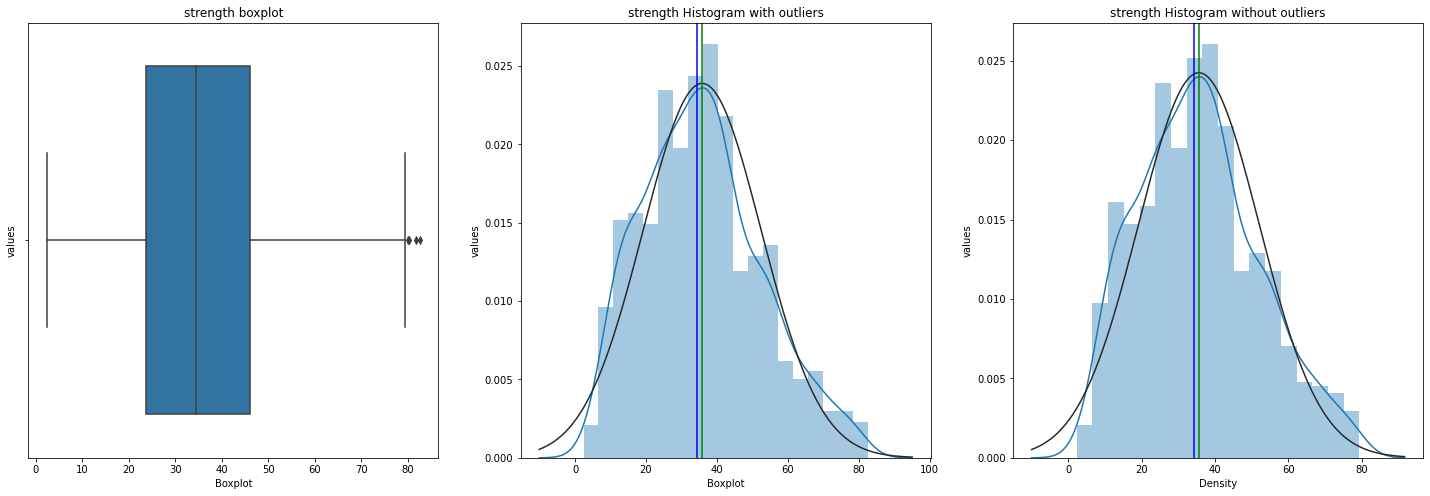

In [10]:
for col in df.columns:
    odt_plots(df, col)

## Multivariate analysis using regression

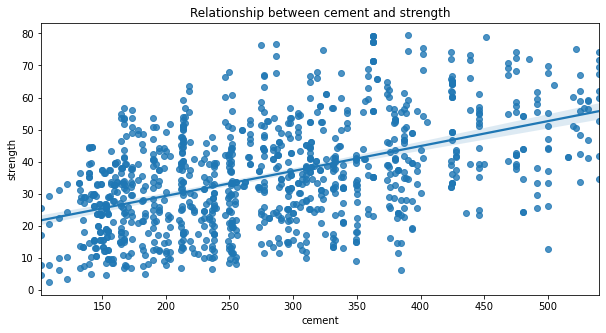

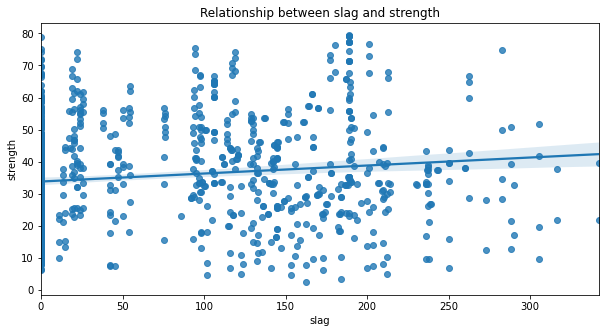

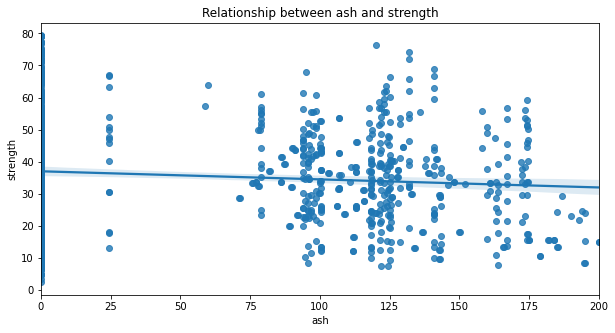

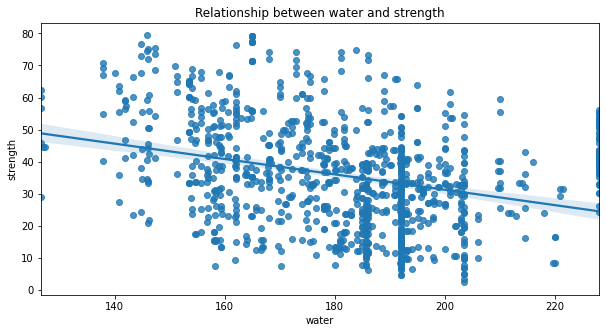

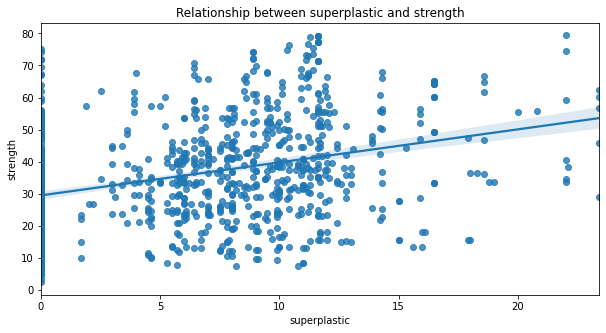

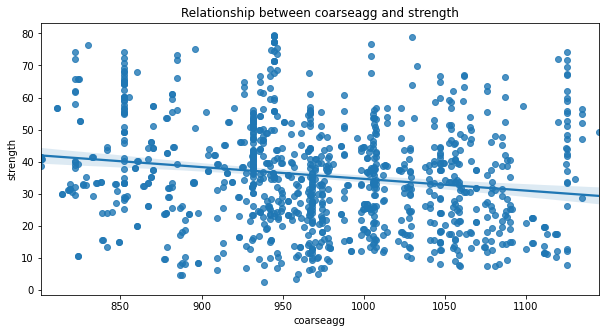

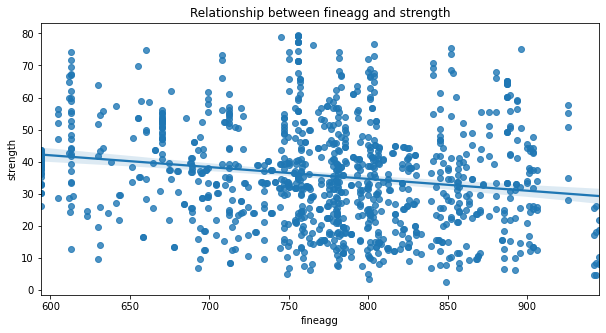

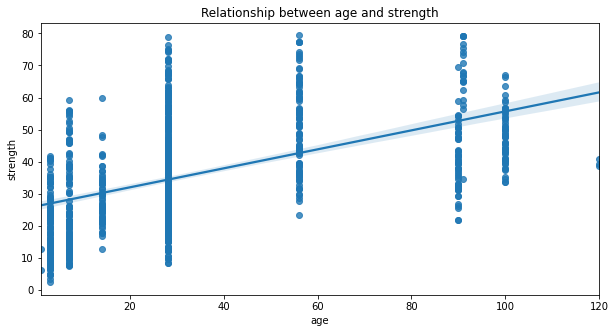

In [11]:
for col in df.columns:
    if col != 'strength':
        fig, ax1 = plt.subplots(figsize = (10,5))
        sns.regplot(x = df[col], y= df['strength'], ax= ax1).set_title(f'Relationship between {col} and strength')
        

## Analysis
1. cement & strength are highly positively correlated.
2. slag and strength are slightly positively correlated.
3. ash and strength are slightly negatively correlated.
4. water and strength are highly negatively correlated.
5. superplastic and strength are highly positively correlated.
6. coarseagg and strength are slightly negatively correlated.
7. fineagg and strength are slightly negatively correlated.
8. age and strength are highly positively correlated.

## Multicollinearity check
1. Stage 1: correlation matrix/ heatmap

In [12]:
corr = df.corr()

<AxesSubplot:>

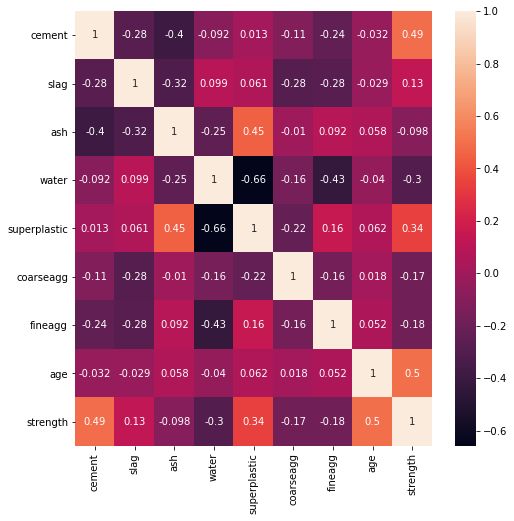

In [14]:
f, ax = plt.subplots(figsize=(8,8))
sns.heatmap(corr, annot= True)

## Analysis:
1. cement and ash has 40% correlation.
2. 